We start with a boolean matrix A, and generate row and column distance matrices
R and C using Hamming distance.  We perform hierarchical clustering on R and C,
then look to each possible choice of cut level on the dendrograms to get
different combinations of rows and columns.  Each choice of cut levels results
in a different bicluster.  For each bicluster, we compute the concentration of
1's.  The bicluster with the highest concentration will be the chosen bicluster.



Step 1:  Generate a boolean matrix A.

Step 2:  Get row distance matrix R and column distance matrix C
		 using hamming distance.
		 
Step 3:  Perform hierarchical clustering on R, and again on C to get
		 two dendrograms D_r and D_c.  Plot these visually.
		 
Step 4:  For each cut level in D_r and each cut level in D_c, produce
		 biclusters formed by each combination of rows and columns.  Also
		 calculate the 0,1 concentration of each bicluster.  If there are not
		 too many combinations, plot the biclusters.
		 
Step 5:  Find the bicluster with the best 0,1 concentration and plot it again,
		 so that we clearly see the "best" bicluster
		 
Step 6:  Also perform Cheng and Church biclustering on A and plot the results
		 for comparison.

In [23]:

from scipy.cluster.hierarchy import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def singleLinkage(mat):
    return linkage(mat,method='single', metric='hamming')
def plot_dendrogram(Z):
    return dendrogram(Z, leaf_rotation=0., leaf_font_size=8.)





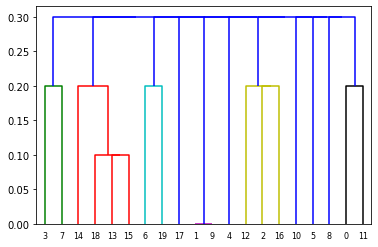

In [35]:
size = (20,10)
mat = np.random.choice([1,0],size)

ZR = singleLinkage(mat)
ZC = singleLinkage(np.transpose(mat))

denR = plot_dendrogram(ZR)


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [65.0, 65.0, 75.0, 75.0],
  [95.0, 95.0, 105.0, 105.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [155.0, 155.0, 173.75, 173.75],
  [132.5, 132.5, 164.375, 164.375],
  [115.0, 115.0, 148.4375, 148.4375],
  [100.0, 100.0, 131.71875, 131.71875],
  [85.0, 85.0, 115.859375, 115.859375],
  [70.0, 70.0, 100.4296875, 100.4296875],
  [33.75, 33.75, 85.21484375, 85.21484375],
  [10.0, 10.0, 59.482421875, 59.482421875]],
 'dcoord': [[0.0, 0.2, 0.2, 0.0],
  [0.0, 0.1, 0.1, 0.0],
  [0.0, 0.1, 0.1, 0.1],
  [0.0, 0.2, 0.2, 0.1],
  [0.0, 0.2, 0.2, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.2, 0.2, 0.0],
  [0.0, 0.2, 0.2, 0.2],
  [0.0, 0.2, 0.2, 0.0],
  [0.0, 0.3, 0.3, 0.2],
  [0.0, 0.3, 0.3, 0.3],
  [0.0, 0.3, 0.3, 0.3],
  [0.2, 0.3, 0.3, 0.3],
  [0.0, 0.3, 0.3, 0.3

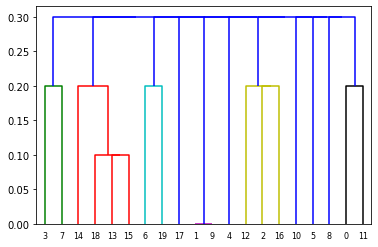

In [40]:
dendrogram(ZR, leaf_rotation=0., leaf_font_size=8.)

In [55]:
cutree = cut_tree(ZC, height=0.36)
cutree

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0]])

In [137]:
def getClusters(Z):
#     from heapq import *
    from heapq import heappush, heappop
    j = 0
    clusters = []
    dis = np.unique(Z[:,2]).tolist()
#     dis.append(1)
    if dis[0] == 0:
        dis = dis[1:]
    for hei in dis:
        cutree = cut_tree(Z, height=hei)
        labels = np.unique(cutree)
        for label in labels:
            temp = np.where(cutree == label)[0]
            if len(temp) > 1:
                heappush(clusters,(len(temp),j,temp,hei))
                j += 1
    table = [heappop(clusters) for i in range(len(clusters))][::-1]
    return [(item[0],item[2],item[3]) for item in table ]

In [138]:
clusR = getClusters(ZR)

In [150]:
clusR

[(4, array([13, 14, 15, 18]), 0.3),
 (3, array([ 2, 12, 16]), 0.3),
 (3, array([13, 15, 18]), 0.2),
 (2, array([ 6, 19]), 0.3),
 (2, array([3, 7]), 0.3),
 (2, array([1, 9]), 0.3),
 (2, array([ 0, 11]), 0.3),
 (2, array([1, 9]), 0.2),
 (2, array([1, 9]), 0.1)]

In [151]:
clusR[0][1]

array([13, 14, 15, 18])

In [140]:
clusC = getClusters(ZC)

In [148]:
clusC

[(8, array([0, 2, 3, 4, 5, 6, 8, 9]), 0.4),
 (4, array([2, 3, 4, 8]), 0.35),
 (3, array([2, 3, 8]), 0.3),
 (2, array([1, 7]), 0.4),
 (2, array([5, 6]), 0.35)]

In [181]:
def plot_table(axes, df, sub_mat = None, title = 'matrix'):
    axes.set_title(title)
    data = df.values
    axes.axis('off')
    stripe = np.empty(np.array(data).shape, dtype=np.dtype(('U10', 1)) )
    rowColours = []
    colWidths = [0.12 for _ in range(0, stripe.shape[0])]
    for i in range(0,stripe.shape[0]):
        for j in range(0, stripe.shape[1]):

            if i % 2 == 0:
                stripe[i,j] = '0.9'

            else:
                stripe[i,j] = 'w'
    if sub_mat is not None:
        for i in sub_mat[0]:
            for j in sub_mat[1]:
                stripe[i,j] = 'g'

    rowColours = []
    for j in range(0, stripe.shape[0]):
        if j % 2 == 0:    
            rowColours.append('0.9')
        else:
            rowColours.append('1.0')
    stripe
    axes.table(cellText=data,
                          cellColours=stripe,
                          rowColours = rowColours,
                          loc='center',
                          rowLabels=list(df.index),
                          colLabels=list(df.columns),
                          colWidths = colWidths,
                          )

def plot_parallel(ax, df, title = 'Parallel coordinates'):
    

    ax.set_title(title)
    df["index"] = df.index.values
    pd.plotting.parallel_coordinates(
            df, "index", ax=ax, 'mpg'
#             color=('#556270', '#4ECDC4', '#C7F464')
    )

    
def parallelPlot(ax, mat, submat, title):
    rows, cols = submat[0], submat[1]
    df = pd.DataFrame(mat[rows][:,cols],
                      index=rows,columns=cols)
    plot_parallel(ax,df,title=title)


SyntaxError: positional argument follows keyword argument (<ipython-input-181-e8b356e63bc9>, line 43)

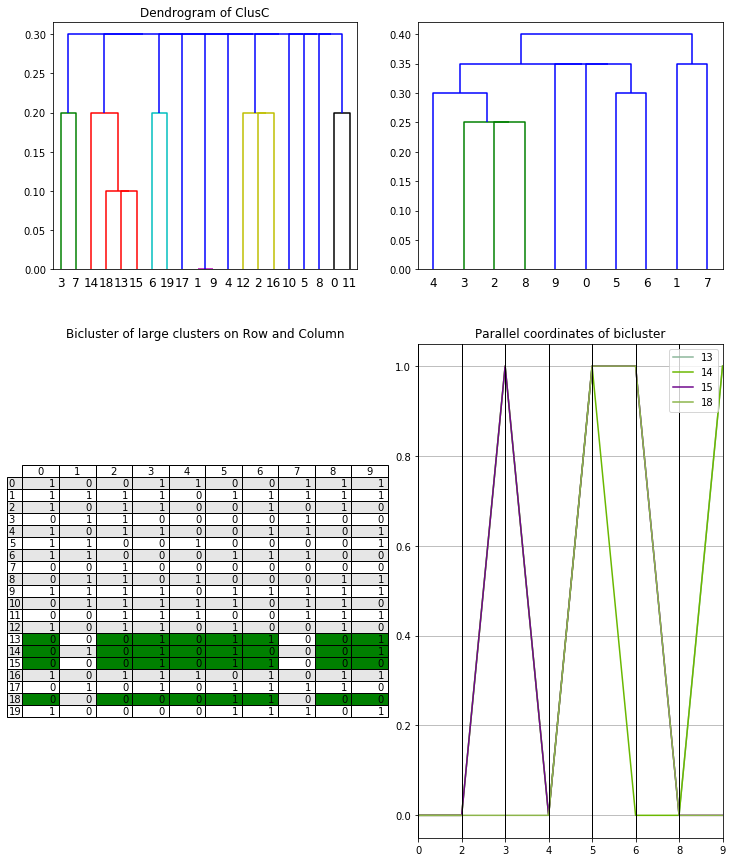

In [183]:
# fig, axes = plt.subplots(2, 2, figsize=(12, 15))

fig5 = plt.figure(figsize=(12, 15),constrained_layout=False)
widths = [1, 1]
heights = [1, 2]
spec5 = fig5.add_gridspec(ncols=2, nrows=2, width_ratios=widths,
                          height_ratios=heights)

axes = np.empty((2,2),dtype = object)
for row in range(2):
    for col in range(2):
        
        
        axes[row][col] = fig5.add_subplot(spec5[row, col])
        
        
#         label = 'Width: {}\nHeight: {}'.format(widths[col], heights[row])
#         ax.annotate(label, (0.1, 0.5), xycoords='axes fraction', va='center')


dn1 = dendrogram(ZR, ax=axes[0,0] )
axes[0,0].set_title(r'Dendrogram of ClusR')
dn2 = dendrogram(ZC, ax=axes[0,1])
axes[0,0].set_title(r'Dendrogram of ClusC')



mat_df = pd.DataFrame(mat)
plot_table(axes[1,0],mat_df,sub_mat=[clusR[0][1],clusC[0][1]],
           title = f'Bicluster of large clusters on Row and Column')

parallelPlot(axes[1,1],mat,[clusR[0][1],clusC[0][1]],
           title = f'Parallel coordinates of bicluster')




plt.show()

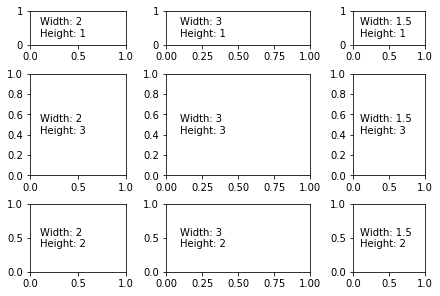

In [163]:
widths = [2, 3, 1.5]
heights = [1, 3, 2]
gs_kw = dict(width_ratios=widths, height_ratios=heights)
fig6, f6_axes = plt.subplots(ncols=3, nrows=3, constrained_layout=True,
        gridspec_kw=gs_kw)
for r, row in enumerate(f6_axes):
    for c, ax in enumerate(row):
        label = 'Width: {}\nHeight: {}'.format(widths[c], heights[r])
        ax.annotate(label, (0.1, 0.5), xycoords='axes fraction', va='center')

[(8, array([0, 2, 3, 4, 5, 6, 8, 9]), 0.4),
 (4, array([2, 3, 4, 8]), 0.35),
 (3, array([2, 3, 8]), 0.3),
 (2, array([1, 7]), 0.4),
 (2, array([5, 6]), 0.35)]

numpy.ndarray

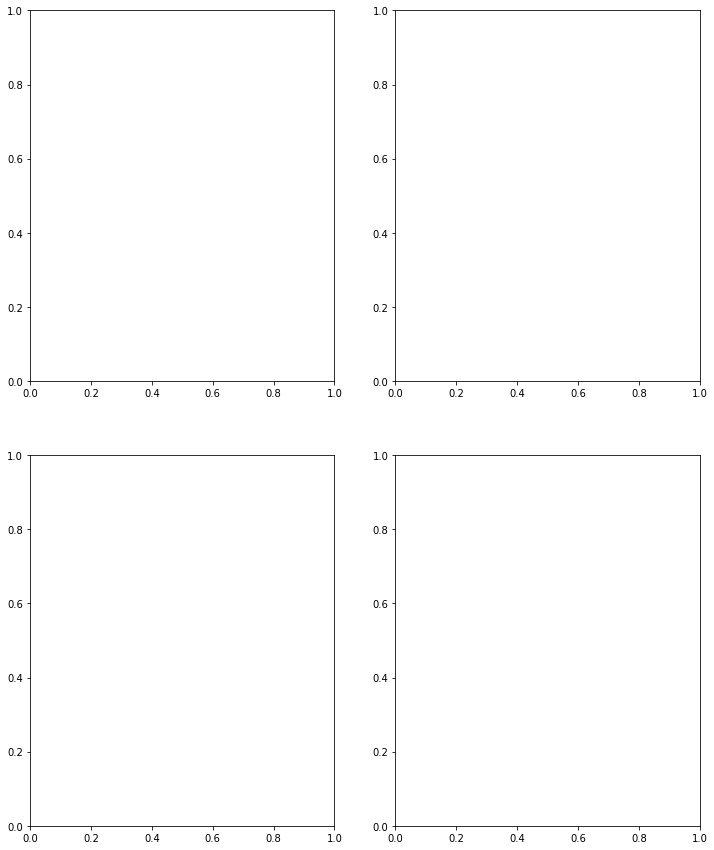

In [174]:
fig, axes = plt.subplots(2, 2, figsize=(12, 15))
type(axes)

In [189]:
import pprint

pp = pprint.PrettyPrinter(indent=1)
pp.pprint(clusC)
print('\nClusC of ')
pp.pprint(clusR)



[(8, array([0, 2, 3, 4, 5, 6, 8, 9]), 0.4),
 (4, array([2, 3, 4, 8]), 0.35),
 (3, array([2, 3, 8]), 0.3),
 (2, array([1, 7]), 0.4),
 (2, array([5, 6]), 0.35)]

ClusC of 
[(4, array([13, 14, 15, 18]), 0.3),
 (3, array([ 2, 12, 16]), 0.3),
 (3, array([13, 15, 18]), 0.2),
 (2, array([ 6, 19]), 0.3),
 (2, array([3, 7]), 0.3),
 (2, array([1, 9]), 0.3),
 (2, array([ 0, 11]), 0.3),
 (2, array([1, 9]), 0.2),
 (2, array([1, 9]), 0.1)]
